In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR


In [165]:
# collecting uncertainty data
df1 = pd.read_csv("WUIUSA.csv")
df1[df1['DATE']=='1980-01-01']
df1 = df1.iloc[112:,:]
df1.reset_index(inplace=True)
df1.drop('index',axis=1,inplace=True)

df1['Year'] = np.nan
for i in range(len(df1)):
    df1['Year'].iloc[i] = df1['DATE'].iloc[i][0:4]
df1['Quarter'] = np.nan
for i in range(len(df1)):
    if df1['DATE'].iloc[i][5:7] == '01':
        df1['Quarter'].iloc[i] = '1'
    elif df1['DATE'].iloc[i][5:7] == '04':
        df1['Quarter'].iloc[i] = '2'
    elif df1['DATE'].iloc[i][5:7] == '07':
        df1['Quarter'].iloc[i] = '3'
    else:
        df1['Quarter'].iloc[i] = '4'

df1['Period'] = df1['Year'] + 'Q' + df1['Quarter']
df1.drop(['DATE','Year','Quarter'],axis=1,inplace=True)
df1
    

c:\Users\tonoh\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,WUIUSA,Period
0,0.057703,1980Q1
1,0.000000,1980Q2
2,0.137193,1980Q3
3,0.053735,1980Q4
4,0.176876,1981Q1
...,...,...
171,0.166223,2022Q4
172,0.371767,2023Q1
173,0.584966,2023Q2
174,0.183307,2023Q3


In [166]:
# collecting realgdp data
df2 = pd.read_csv('GDPC1.csv')
df2[df2['DATE']=='1980-01-01']
df2 = df2.iloc[132:,:]
df2.reset_index(inplace=True)
df2.drop('index',axis=1,inplace=True)

df2['Year'] = np.nan
for i in range(len(df2)):
    df2['Year'].iloc[i] = df2['DATE'].iloc[i][0:4]
df2['Quarter'] = np.nan
for i in range(len(df2)):
    if df2['DATE'].iloc[i][5:7] == '01':
        df2['Quarter'].iloc[i] = '1'
    elif df2['DATE'].iloc[i][5:7] == '04':
        df2['Quarter'].iloc[i] = '2'
    elif df2['DATE'].iloc[i][5:7] == '07':
        df2['Quarter'].iloc[i] = '3'
    else:
        df2['Quarter'].iloc[i] = '4'

df2['Period'] = df2['Year'] + 'Q' + df2['Quarter']
df2.drop(['DATE','Year','Quarter'],axis=1,inplace=True)
df2


c:\Users\tonoh\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,GDPC1,Period
0,7341.557,1980Q1
1,7190.289,1980Q2
2,7181.743,1980Q3
3,7315.677,1980Q4
4,7459.022,1981Q1
...,...,...
171,21989.981,2022Q4
172,22112.329,2023Q1
173,22225.350,2023Q2
174,22490.692,2023Q3


In [117]:
# collecting inequality data
df3 = pd.read_csv('Income  Data.csv')
df3 = df3[['Year','Quarter','Group','Real Factor Income Share']]
df4 = df3[df3['Group']=='Bottom 50%']
df5 = df3[df3['Group']=='Top 1%']

df4 = df4[df4['Year']>=1980]
df4.reset_index(inplace=True)
df4.drop(['index','Group'],axis=1,inplace=True)
df4.rename(columns={'Real Factor Income Share': 'Bottom 50% Income Share'}, inplace =True)
df4['Year'] = df4['Year'].astype('str')
df4['Quarter'] = df4['Quarter'].astype('str')
df4['Period'] = df4['Year'] + 'Q' + df4['Quarter']
df4.drop(['Year','Quarter'],axis=1,inplace=True)
df4

df5 = df5[df5['Year']>=1980]
df5.reset_index(inplace=True)
df5.drop(['index','Group'],axis=1,inplace=True)
df5.rename(columns={'Real Factor Income Share': 'Top 1% Income Share'}, inplace =True)
df5['Year'] = df5['Year'].astype('str')
df5['Quarter'] = df5['Quarter'].astype('str')
df5['Period'] = df5['Year'] + 'Q' + df5['Quarter']
df5.drop(['Year','Quarter'],axis=1,inplace=True)
df5


,Top 1% Income Share,Period
0,0.113306,1980Q1
1,0.111907,1980Q2
2,0.114150,1980Q3
3,0.116956,1980Q4
4,0.117544,1981Q1
...,...,...
168,0.226775,2022Q1
169,0.229078,2022Q2
170,0.228642,2022Q3
171,0.227533,2022Q4


In [186]:
# Merging datasets
df0 = pd.merge(df4,df5)
df = pd.merge(df1,df2)
df = pd.merge(df0,df, on = 'Period')
df.set_index('Period',inplace=True)
df


,Bottom 50% Income Share,Top 1% Income Share,WUIUSA,GDPC1
Period,,,,
1980Q1,0.117397,0.113306,0.057703,7341.557
1980Q2,0.115968,0.111907,0.000000,7190.289
1980Q3,0.113896,0.114150,0.137193,7181.743
1980Q4,0.112626,0.116956,0.053735,7315.677
1981Q1,0.112068,0.117544,0.176876,7459.022
...,...,...,...,...
2022Q1,0.078663,0.226775,0.199144,21738.871
2022Q2,0.078776,0.229078,0.170571,21708.160
2022Q3,0.079128,0.228642,0.170629,21851.134


In [187]:
df.describe()

,Bottom 50% Income Share,Top 1% Income Share,WUIUSA,GDPC1
count,173.000000,173.000000,173.000000,173.000000
mean,0.090543,0.176791,0.153520,14066.173763
std,0.010479,0.031271,0.149475,4408.449451
min,0.074579,0.111907,0.000000,7181.743000
25%,0.080101,0.156413,0.053735,10047.386000
50%,0.090783,0.180116,0.113469,14253.574000
75%,0.099449,0.205823,0.218160,17444.525000
max,0.117397,0.229078,0.786741,22112.329000


In [188]:
df['B50'] = np.log(df['Bottom 50% Income Share']).diff()
df['T1'] = np.log(df['Top 1% Income Share']).diff()
df['Growth'] = np.log(df['GDPC1']).diff()
df

,Bottom 50% Income Share,Top 1% Income Share,WUIUSA,GDPC1,B50,T1,Growth
Period,,,,,,,
1980Q1,0.117397,0.113306,0.057703,7341.557,NaN,NaN,NaN
1980Q2,0.115968,0.111907,0.000000,7190.289,-0.012253,-0.012425,-0.020820
1980Q3,0.113896,0.114150,0.137193,7181.743,-0.018027,0.019846,-0.001189
1980Q4,0.112626,0.116956,0.053735,7315.677,-0.011215,0.024284,0.018477
1981Q1,0.112068,0.117544,0.176876,7459.022,-0.004968,0.005017,0.019405
...,...,...,...,...,...,...,...
2022Q1,0.078663,0.226775,0.199144,21738.871,-0.002770,0.002778,-0.004989
2022Q2,0.078776,0.229078,0.170571,21708.160,0.001437,0.010104,-0.001414
2022Q3,0.079128,0.228642,0.170629,21851.134,0.004458,-0.001907,0.006565


In [206]:
dfnew = df.drop(['Bottom 50% Income Share','Top 1% Income Share', 'GDPC1'], axis=1)
dfnew.rename(columns={'WUIUSA':'Uncertainty'},inplace=True)
dfnew.dropna(inplace=True)
dfnew

,Uncertainty,B50,T1,Growth
Period,,,,
1980Q2,0.000000,-0.012253,-0.012425,-0.020820
1980Q3,0.137193,-0.018027,0.019846,-0.001189
1980Q4,0.053735,-0.011215,0.024284,0.018477
1981Q1,0.176876,-0.004968,0.005017,0.019405
1981Q2,0.103130,0.001536,-0.012124,-0.007438
...,...,...,...,...
2022Q1,0.199144,-0.002770,0.002778,-0.004989
2022Q2,0.170571,0.001437,0.010104,-0.001414
2022Q3,0.170629,0.004458,-0.001907,0.006565


In [207]:
cols1 = dfnew.columns.tolist()
cols1 = ['Uncertainty'] + ['Growth'] + ['B50']
dfb = dfnew[cols1]
dfb

cols2 = dfnew.columns.tolist()
cols2 = ['Uncertainty'] + ['Growth'] + ['T1']
dft = dfnew[cols2]
dft


,Uncertainty,Growth,T1
Period,,,
1980Q2,0.000000,-0.020820,-0.012425
1980Q3,0.137193,-0.001189,0.019846
1980Q4,0.053735,0.018477,0.024284
1981Q1,0.176876,0.019405,0.005017
1981Q2,0.103130,-0.007438,-0.012124
...,...,...,...
2022Q1,0.199144,-0.004989,0.002778
2022Q2,0.170571,-0.001414,0.010104
2022Q3,0.170629,0.006565,-0.001907


In [209]:
model1 = VAR(dfb)
model2 = VAR(dft)

c:\Users\tonoh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\tonoh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


In [226]:
#model1.select_order(8)
model2.select_order(8)
#results = model1.fit(maxlags = 8, ic = 'aic')
results = model2.fit(maxlags = 8, ic = 'aic')
results.summary()


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 09, Feb, 2024
Time:                     13:33:46
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -22.3701
Nobs:                     171.000    HQIC:                  -22.5011
Log likelihood:           1215.58    FPE:                1.54540e-10
AIC:                     -22.5906    Det(Omega_mle):     1.44183e-10
--------------------------------------------------------------------
Results for equation Uncertainty
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  0.068178         0.015536            4.388           0.000
L1.Uncertainty         0.571653         0.065589            8.716           0.000
L1.Growth             -0.040077         1.054534  

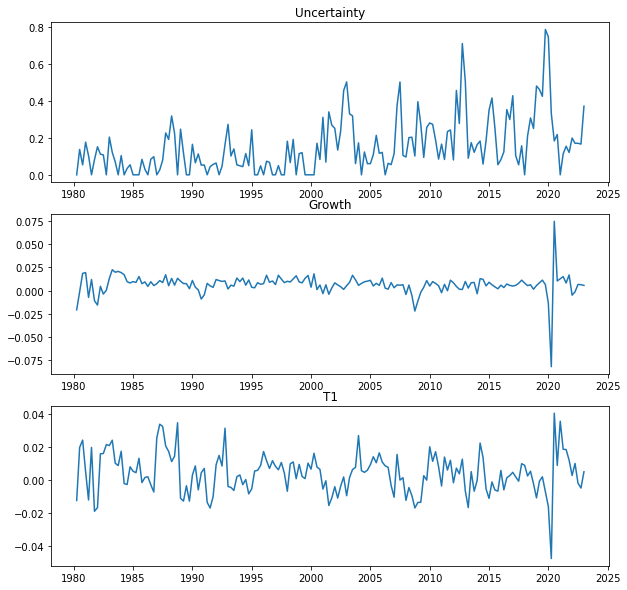

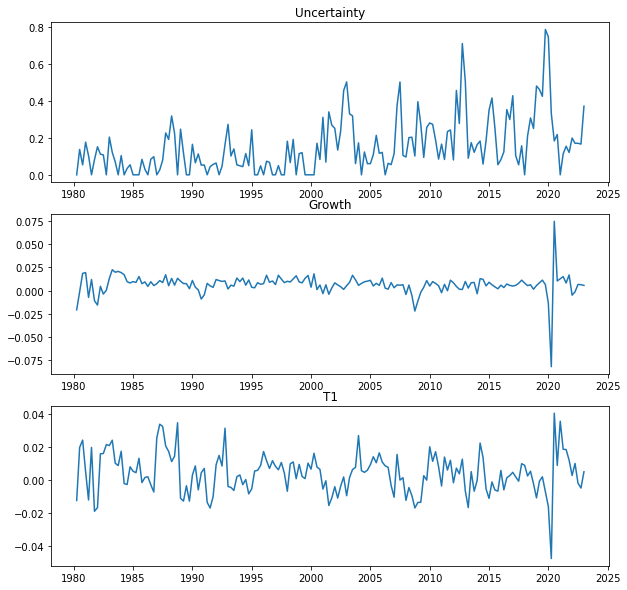

In [227]:
results.plot()

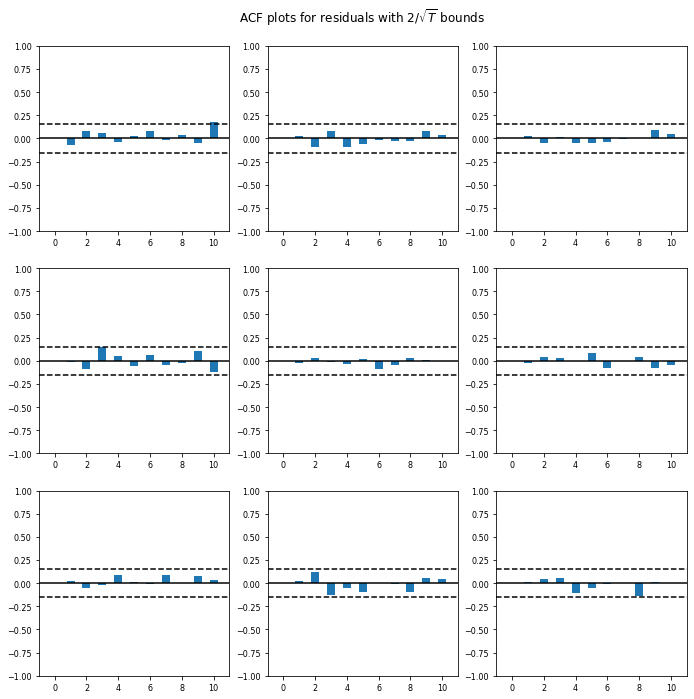

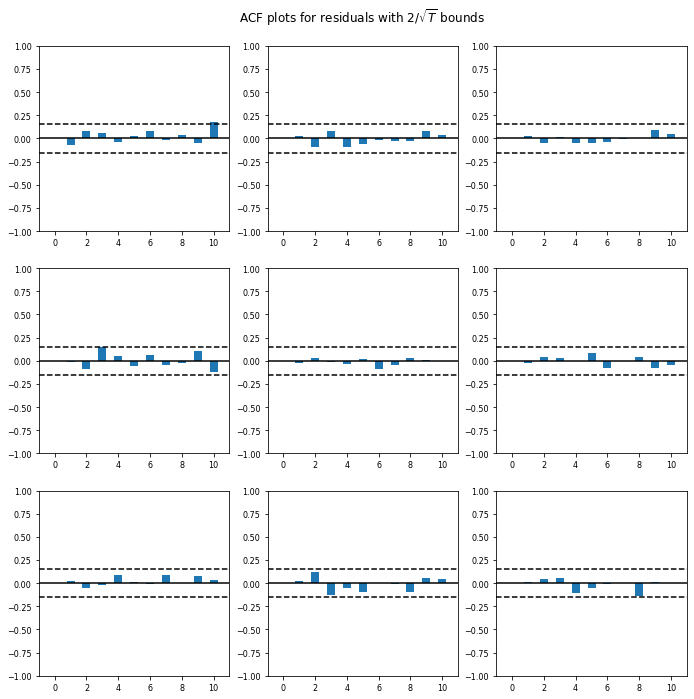

In [228]:
results.plot_acorr()

In [229]:
lag_order = results.k_ar
results.forecast(dfb.values[-lag_order:],12)

array([[ 0.28043017,  0.00239139, -0.00091306],
       [ 0.22845693,  0.00433445,  0.00109769],
       [ 0.19852353,  0.00518049,  0.00223274],
       [ 0.18129634,  0.00571829,  0.00297451],
       [ 0.17137337,  0.00603245,  0.00342393],
       [ 0.16565591,  0.00621623,  0.00369145],
       [ 0.16236086,  0.006323  ,  0.00384855],
       [ 0.16046164,  0.00638486,  0.00394013],
       [ 0.15936687,  0.00642062,  0.00399328],
       [ 0.15873578,  0.00644127,  0.00402405],
       [ 0.15837197,  0.00645319,  0.00404183],
       [ 0.15816224,  0.00646006,  0.00405209]])

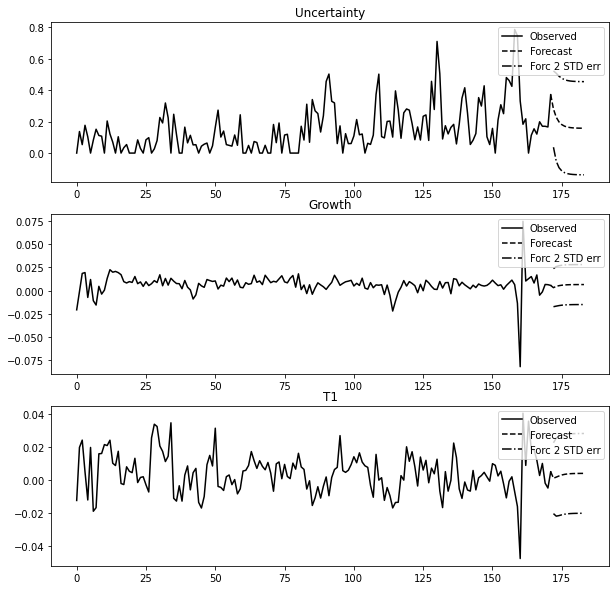

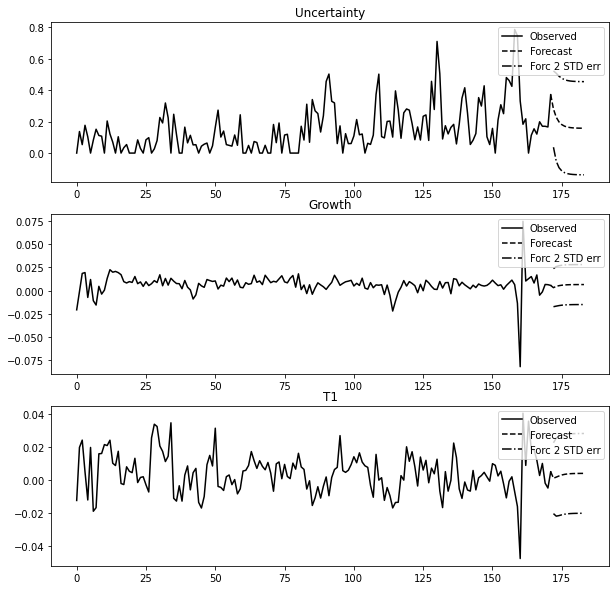

In [230]:
results.plot_forecast(12)

In [231]:
irf = results.irf(10)

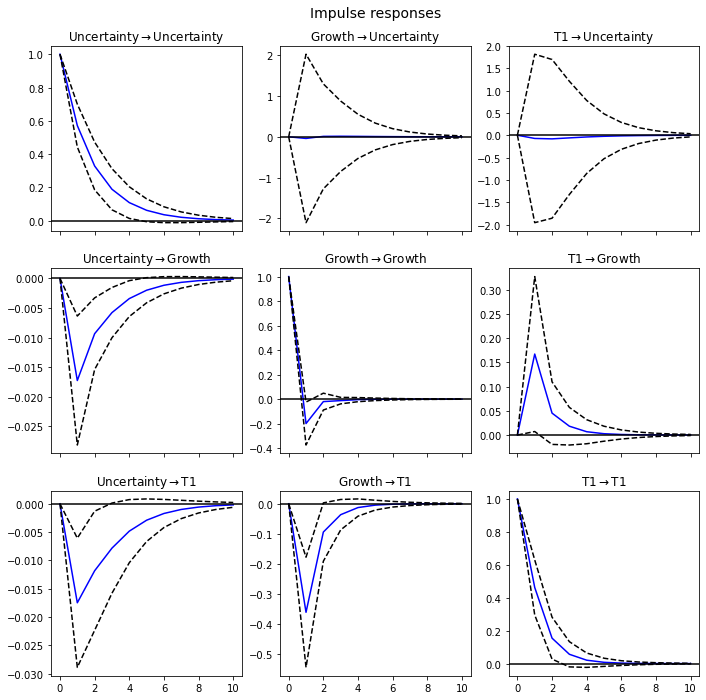

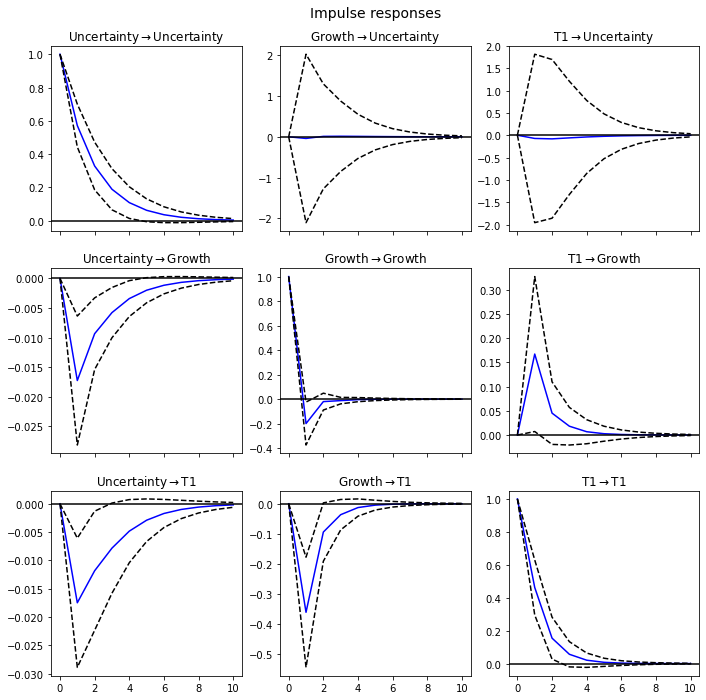

In [232]:
irf.plot(orth=False)

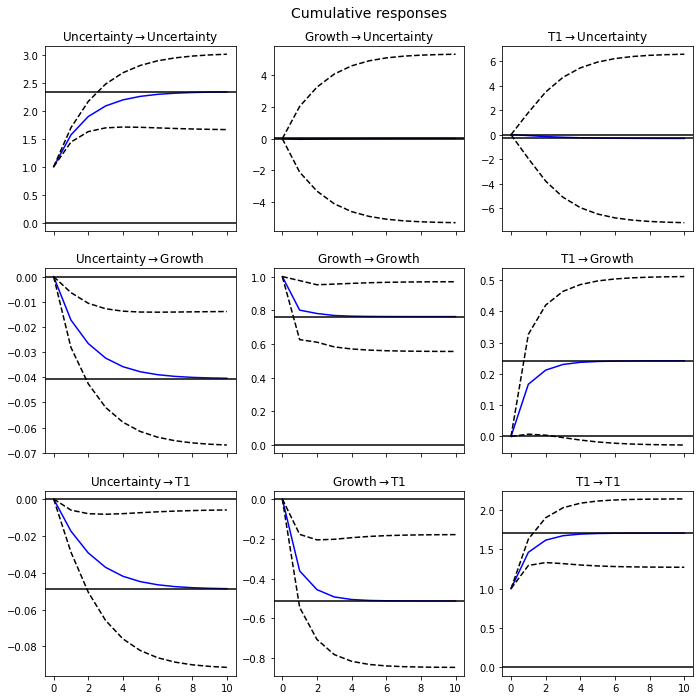

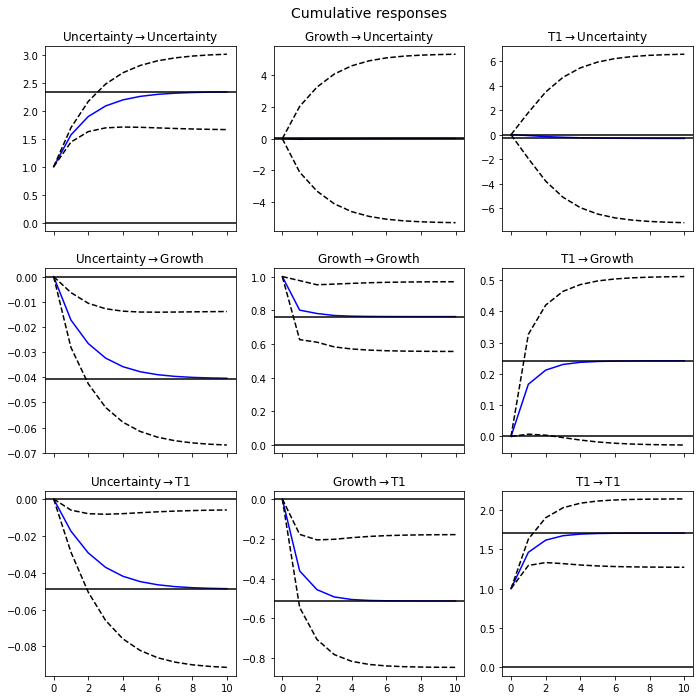

In [233]:
irf.plot_cum_effects(orth=False)

In [234]:
fevd = results.fevd(10)
fevd.summary()

FEVD for Uncertainty
     Uncertainty    Growth        T1
0       1.000000  0.000000  0.000000
1       0.999944  0.000034  0.000022
2       0.999917  0.000037  0.000046
3       0.999904  0.000038  0.000058
4       0.999899  0.000038  0.000063
5       0.999897  0.000038  0.000065
6       0.999896  0.000038  0.000066
7       0.999896  0.000038  0.000066
8       0.999895  0.000038  0.000066
9       0.999895  0.000038  0.000066

FEVD for Growth
     Uncertainty    Growth        T1
0       0.005580  0.994420  0.000000
1       0.046304  0.933605  0.020091
2       0.057719  0.921012  0.021269
3       0.061884  0.916712  0.021404
4       0.063313  0.915283  0.021404
5       0.063800  0.914802  0.021398
6       0.063964  0.914641  0.021395
7       0.064019  0.914587  0.021394
8       0.064037  0.914569  0.021393
9       0.064043  0.914563  0.021393

FEVD for T1
     Uncertainty    Growth        T1
0       0.015362  0.276221  0.708417
1       0.055642  0.236051  0.708307
2       0.070894  0.2289

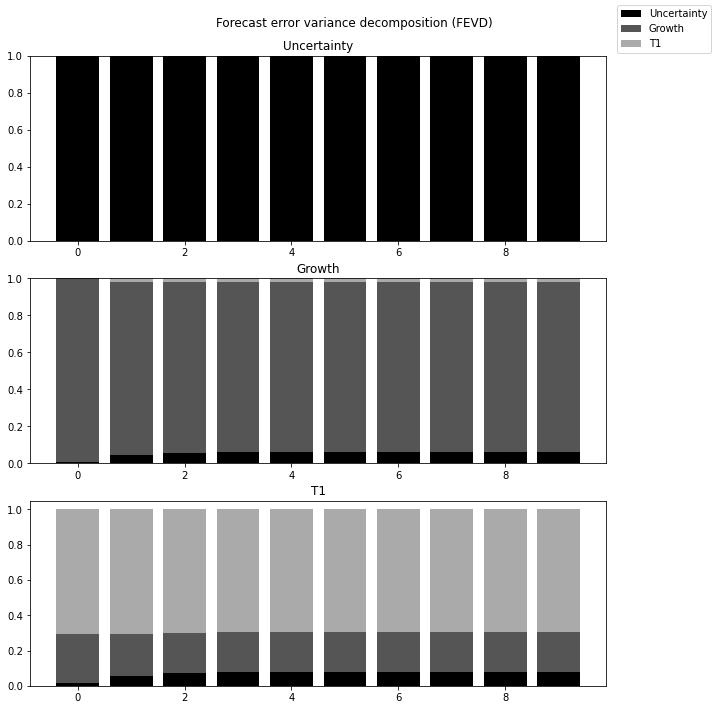

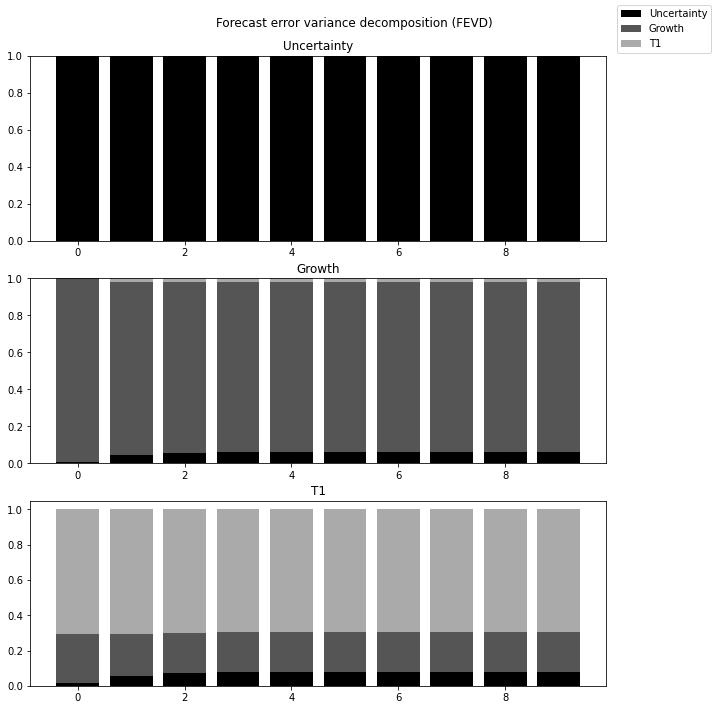

In [235]:
results.fevd(10).plot()